<a href="https://colab.research.google.com/github/dgb1106/PM2.5-Prediction/blob/main/PM2_5_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
path = '/content/drive/MyDrive/PM2.5-prediction-dataset/data_onkk.csv'
df = pd.read_csv(path, parse_dates=['time'])
df.head()

,time,ID,pm25,lat,lon,SQRT_SEA_DEM_LAT,WSPD,WDIR,TMP,TX,TN,TP,RH,PRES2M
0,2020-01-01,19,116.949130,21.049750,105.741870,5.922647,1.136119,145.942749,20.811243,23.219995,18.939997,0.3750,74.750000,102197.203125
1,2020-01-01,79,105.103043,21.015250,105.800130,4.307231,1.136119,145.942749,20.811243,23.219995,18.939997,0.3750,74.750000,102197.203125
2,2020-01-01,163,118.285100,21.024347,106.017288,4.988467,0.651509,145.395233,20.677492,23.029993,18.879999,0.1250,73.687500,102228.796875
3,2020-01-01,300,116.739130,21.023532,105.853941,4.865087,1.136119,145.942749,20.811243,23.219995,18.939997,0.3750,74.750000,102197.203125
4,2020-01-02,19,76.856667,21.049750,105.741870,5.922647,2.744283,147.084442,22.176249,25.119989,20.299982,0.1875,78.012497,102025.328125


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11508 entries, 0 to 11507
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   time              11508 non-null  datetime64[ns]
 1   ID                11508 non-null  int64         
 2   pm25              11508 non-null  float64       
 3   lat               11508 non-null  float64       
 4   lon               11508 non-null  float64       
 5   SQRT_SEA_DEM_LAT  11508 non-null  float64       
 6   WSPD              11508 non-null  float64       
 7   WDIR              11508 non-null  float64       
 8   TMP               11508 non-null  float64       
 9   TX                11508 non-null  float64       
 10  TN                11508 non-null  float64       
 11  TP                11508 non-null  float64       
 12  RH                11508 non-null  float64       
 13  PRES2M            11508 non-null  float64       
dtypes: datetime64[ns](1), 

In [13]:
df.describe()

,time,ID,pm25,lat,lon,SQRT_SEA_DEM_LAT,WSPD,WDIR,TMP,TX,TN,TP,RH,PRES2M
count,11508,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000
mean,2020-12-11 14:51:40.729926912,125.563434,35.549743,21.101977,106.018574,5.325964,2.783826,128.810995,24.694296,28.780240,21.765171,3.501670,71.770136,100954.143533
min,2020-01-01 00:00:00,5.000000,3.023100,20.927000,105.367300,3.382894,0.020039,0.093567,9.192495,11.040003,7.230005,0.000000,25.900000,99105.140625
25%,2020-06-22 00:00:00,60.000000,16.326228,21.027221,105.889544,4.865087,1.696836,87.590500,20.934993,24.409120,18.265497,0.000000,64.862503,100340.634766
50%,2020-12-14 00:00:00,156.000000,27.171879,21.113745,106.017288,5.465172,2.720441,136.356522,24.915009,28.959986,22.269983,0.626563,74.097496,100946.343750
75%,2021-05-20 00:00:00,163.000000,44.422146,21.152745,106.151880,5.693217,3.773106,150.831589,28.925005,33.412499,25.661511,3.312500,80.599998,101519.875000
max,2021-12-31 00:00:00,300.000000,241.724021,21.338470,106.529100,6.696101,9.585102,359.884491,34.650002,41.749992,30.850000,106.687500,97.972504,102818.328125
std,NaN,70.516935,29.450255,0.085400,0.238192,0.620108,1.378970,78.842842,5.099146,6.039901,4.751163,7.465766,11.816262,709.711910


In [14]:
df.isna().sum()

,0
time,0
ID,0
pm25,0
lat,0
lon,0
SQRT_SEA_DEM_LAT,0
WSPD,0
WDIR,0
TMP,0
TX,0


In [29]:
id_counts = df['ID'].value_counts()
print(id_counts)

ID
300    721
62     674
79     621
157    621
159    589
52     586
195    586
51     572
162    571
60     543
19     525
163    522
53     442
169    439
155    418
71     417
156    402
66     394
158    382
54     301
173    297
172    297
160    241
161    182
175    142
5       23
Name: count, dtype: int64


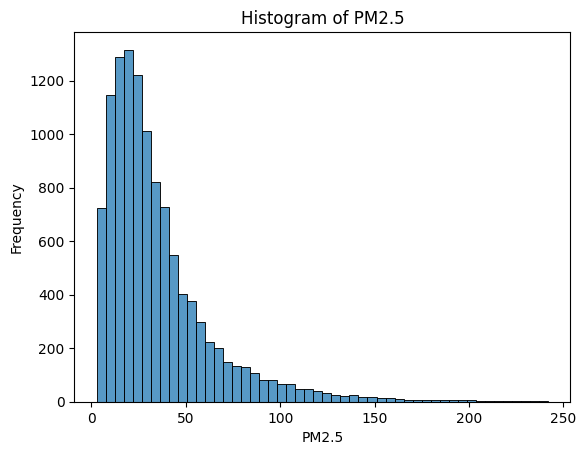

In [19]:
sns.histplot(df['pm25'], bins=50)
plt.xlabel('PM2.5')
plt.ylabel('Frequency')
plt.title('Histogram of PM2.5')
plt.show()

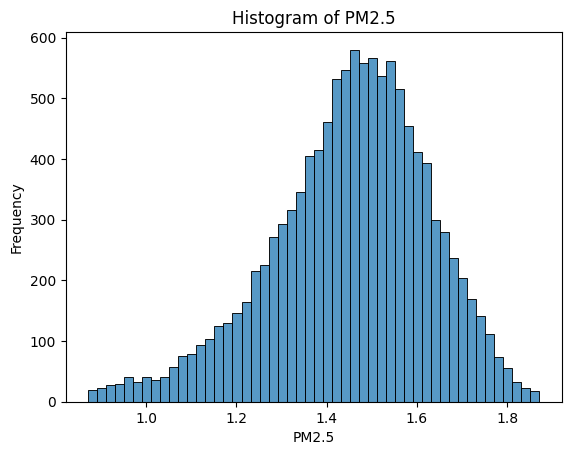

In [47]:
df['pm25'] = np.log1p(df['pm25'])
sns.histplot(df['pm25'], bins=50)
plt.xlabel('PM2.5')
plt.ylabel('Frequency')
plt.title('Histogram of PM2.5')
plt.show()

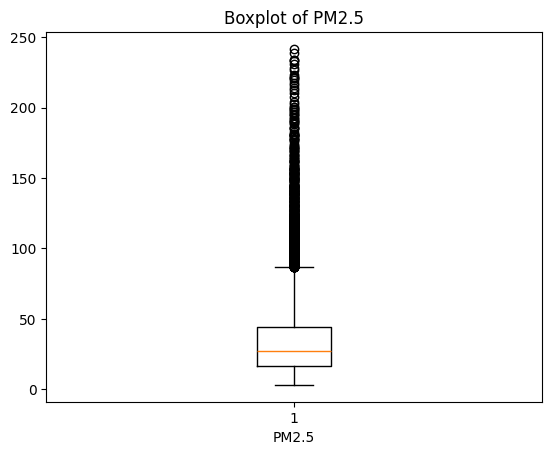

In [22]:
plt.boxplot(df['pm25'])
plt.xlabel('PM2.5')
plt.title('Boxplot of PM2.5')
plt.show()

In [23]:
meteorological_features = ['WSPD', 'WDIR', 'TMP', 'TX', 'TN', 'TP', 'RH', 'PRES2M']
summary_stats = df[meteorological_features].describe()
print(summary_stats)

               WSPD          WDIR           TMP            TX            TN  \
count  11508.000000  11508.000000  11508.000000  11508.000000  11508.000000   
mean       2.783826    128.810995     24.694296     28.780240     21.765171   
std        1.378970     78.842842      5.099146      6.039901      4.751163   
min        0.020039      0.093567      9.192495     11.040003      7.230005   
25%        1.696836     87.590500     20.934993     24.409120     18.265497   
50%        2.720441    136.356522     24.915009     28.959986     22.269983   
75%        3.773106    150.831589     28.925005     33.412499     25.661511   
max        9.585102    359.884491     34.650002     41.749992     30.850000   

                 TP            RH         PRES2M  
count  11508.000000  11508.000000   11508.000000  
mean       3.501670     71.770136  100954.143533  
std        7.465766     11.816262     709.711910  
min        0.000000     25.900000   99105.140625  
25%        0.000000     64.862503

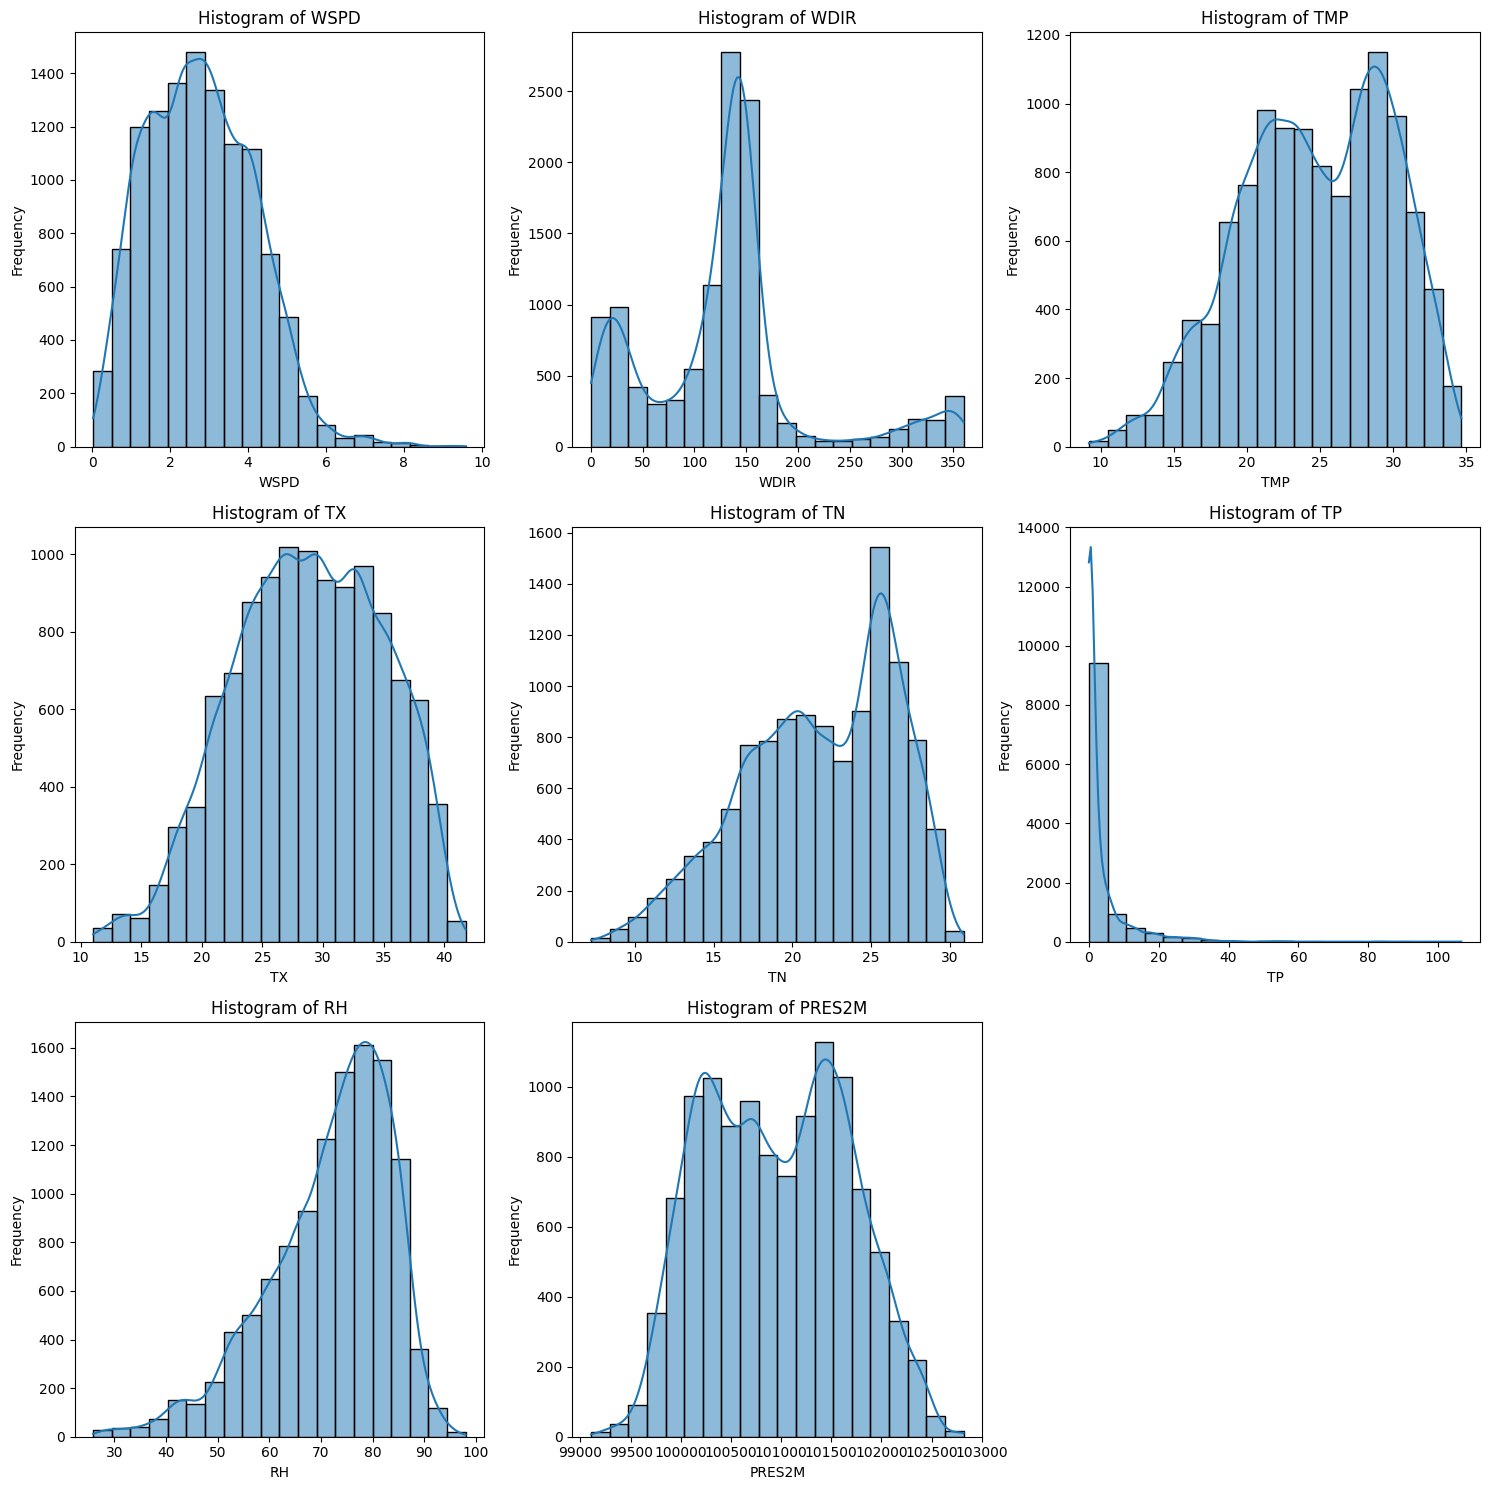

In [26]:
num_rows = (len(meteorological_features) + 2) // 3

fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))

axes = axes.flatten()

for i, feature in enumerate(meteorological_features):
    sns.histplot(df[feature], bins=20, kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

for i in range(len(meteorological_features), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

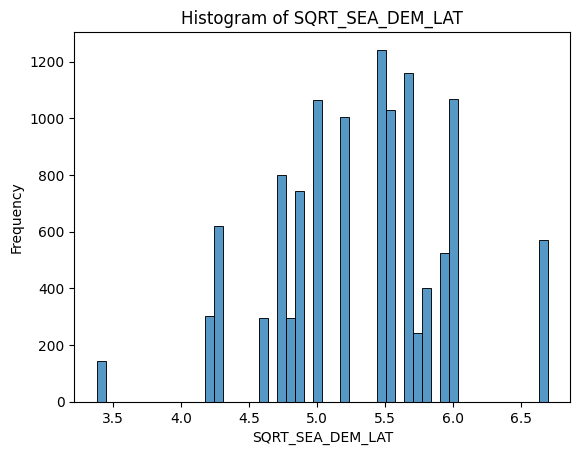

In [27]:
sns.histplot(df['SQRT_SEA_DEM_LAT'], bins=50)
plt.xlabel('SQRT_SEA_DEM_LAT')
plt.ylabel('Frequency')
plt.title('Histogram of SQRT_SEA_DEM_LAT')
plt.show()

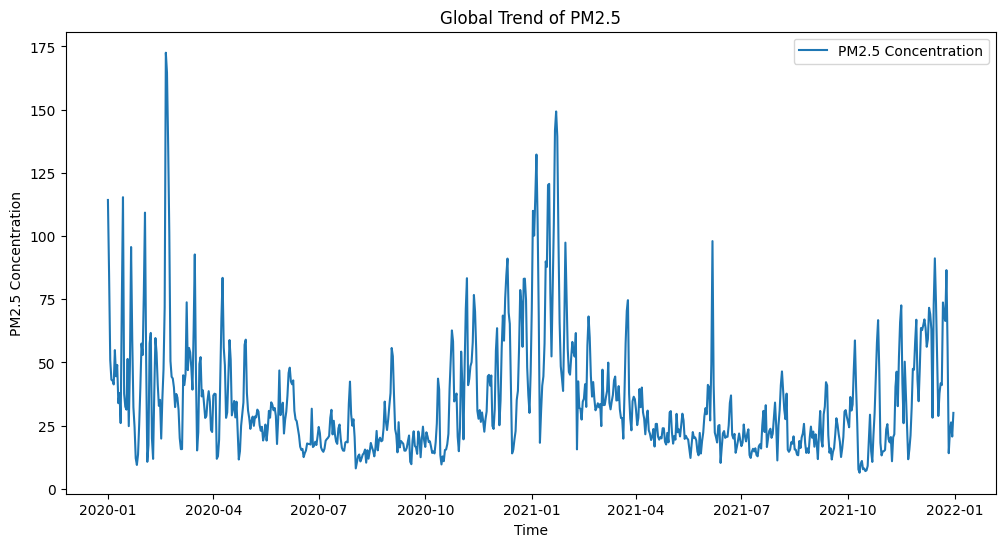

In [32]:
daily_pm25 = df.groupby(pd.Grouper(key='time', freq='D'))['pm25'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(daily_pm25['time'], daily_pm25['pm25'], label='PM2.5 Concentration')
plt.xlabel('Time')
plt.ylabel('PM2.5 Concentration')
plt.title('Global Trend of PM2.5')
plt.legend()
plt.show()

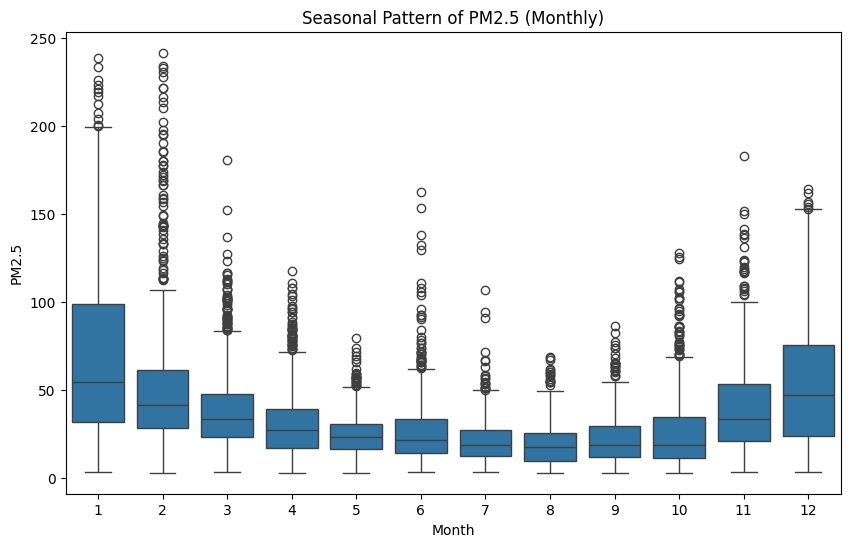

In [33]:
df['month'] = df['time'].dt.month  # Extract month from 'time' column

plt.figure(figsize=(10, 6))
sns.boxplot(x='month', y='pm25', data=df)
plt.xlabel('Month')
plt.ylabel('PM2.5')
plt.title('Seasonal Pattern of PM2.5 (Monthly)')
plt.show()

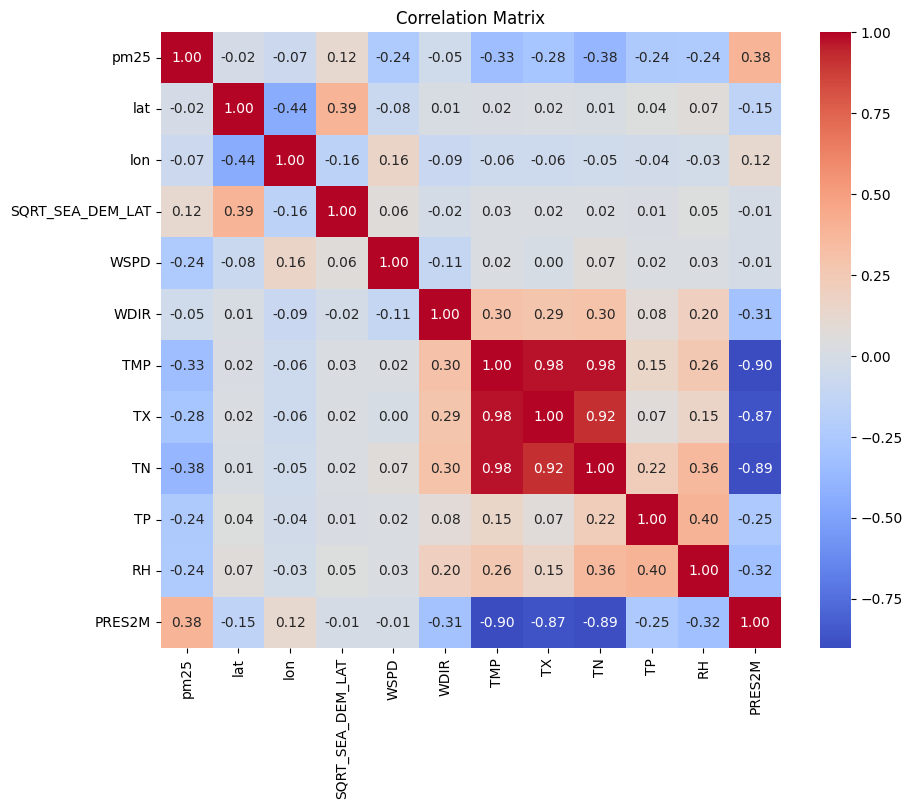

In [37]:
features = ['pm25', 'lat', 'lon', 'SQRT_SEA_DEM_LAT', 'WSPD', 'WDIR', 'TMP', 'TX', 'TN', 'TP', 'RH', 'PRES2M']

correlation_matrix = df[features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

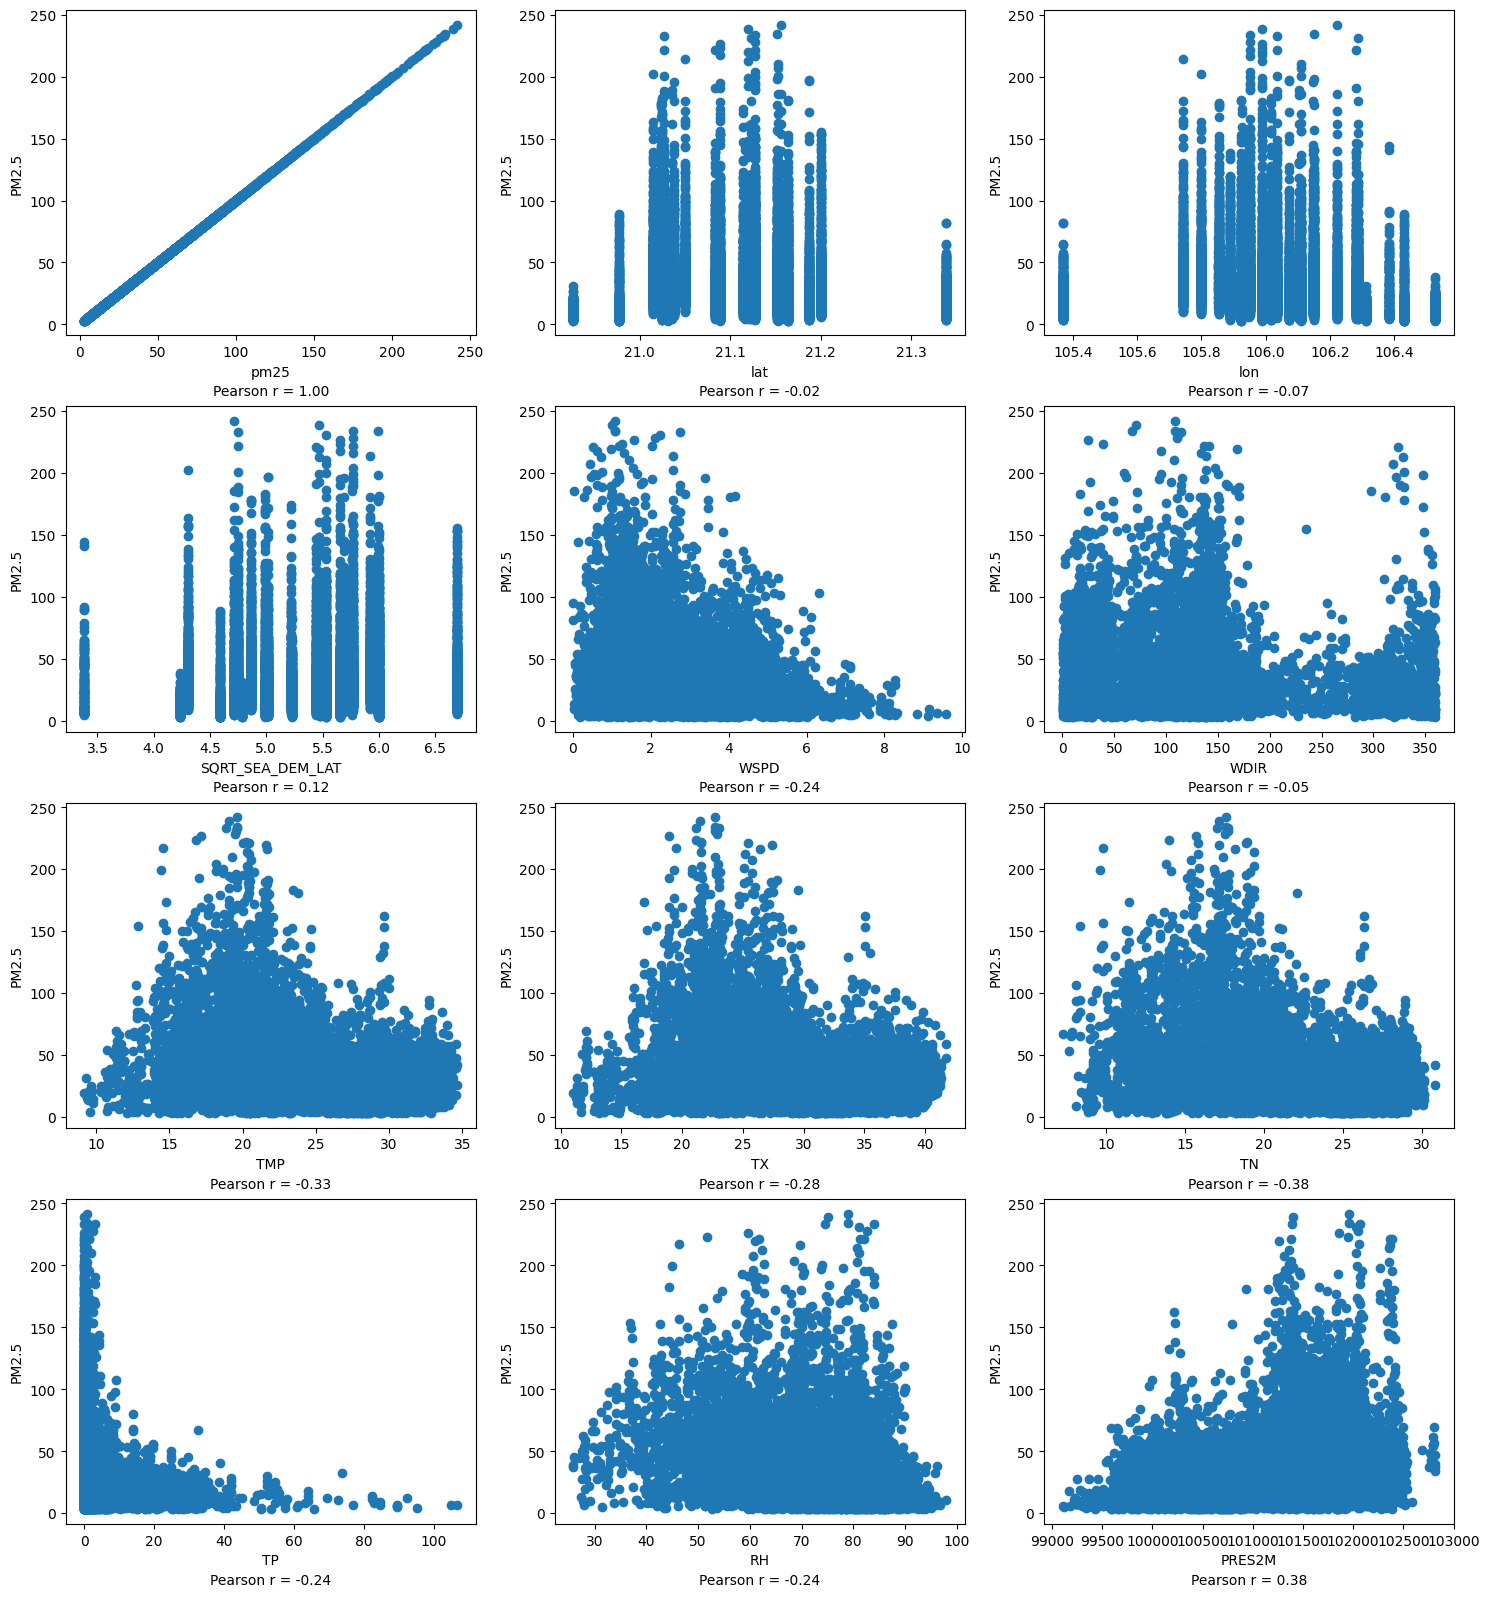

In [44]:
import math

ncols = 3
nrows = math.ceil(len(features) / ncols)

# Create subplots
fig, axes = plt.subplots(nrows, ncols, figsize=(5 * ncols, 4 * nrows))
axes = axes.flatten()

for i, feature in enumerate(features):
  x = df[feature].values
  y = df['pm25'].values
  mask = ~np.isnan(x) & ~np.isnan(y)
  x, y = x[mask], y[mask]

  # Calculate Pearson correlation
  r = np.corrcoef(x, y)[0, 1]

  # Plot
  axes[i].scatter(x, y)
  axes[i].set_xlabel(feature)
  axes[i].set_ylabel('PM2.5')
  axes[i].text(0.5, -0.15, f'Pearson r = {r:.2f}',
                transform=axes[i].transAxes, ha='center', va='top')

for j in range(len(features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [48]:
def month_to_season(month):
    if month in [12, 1, 2]:
        return 0  # Winter
    elif month in [3, 4, 5]:
        return 1  # Spring
    elif month in [6, 7, 8]:
        return 2  # Summer
    else:
        return 3  # Autumn

def add_season_features(dataframe):
    # Convert month to season
    dataframe['season'] = dataframe['time'].dt.month.apply(month_to_season)

    # Create one-hot encoding with all possible seasons
    all_seasons = [0, 1, 2, 3]  # Winter, Spring, Summer, Autumn
    for season in all_seasons:
        dataframe[f'season_{season}'] = (dataframe['season'] == season).astype(int)

    # Drop original season column
    dataframe.drop(columns=['season'], inplace=True)

    return dataframe

In [49]:
def engineering_features(df):
    df = add_season_features(df)

    df['pm25_lag1'] = np.log1p(df['pm25'].shift(1))
    df['pm25_lag2'] = np.log1p(df['pm25'].shift(2))
    df['pm25_lag3'] = np.log1p(df['pm25'].shift(3))

    df['pm25_roll_mean_2'] = df["pm25"].shift(1).rolling(window=2).mean()
    df["pm25_roll_std_2"] = df["pm25"].shift(1).rolling(window=2).std()
    df["pm25_roll_mean_3"] = df["pm25"].shift(1).rolling(window=3).mean()
    df["pm25_roll_std_3"] = df["pm25"].shift(1).rolling(window=3).std()

    # 4. Xử lý NaN
    df = df.dropna().reset_index(drop=True)

    return df

In [50]:
df = engineering_features(df)
df.head()

,time,ID,pm25,lat,lon,SQRT_SEA_DEM_LAT,WSPD,WDIR,TMP,TX,...,season_1,season_2,season_3,pm25_lag1,pm25_lag2,pm25_lag3,pm25_roll_mean_2,pm25_roll_std_2,pm25_roll_mean_3,pm25_roll_std_3
0,2020-01-01,300,1.752407,21.023532,105.853941,4.865087,1.136119,145.942749,20.811243,23.219995,...,0,0,0,1.013296,1.005840,1.012588,1.744434,0.014470,1.747195,0.011294
1,2020-01-02,19,1.678006,21.049750,105.741870,5.922647,2.744283,147.084442,22.176249,25.119989,...,0,0,0,1.012476,1.013296,1.005840,1.753537,0.001597,1.747092,0.011219
2,2020-01-02,51,1.739642,21.200344,105.948544,6.696101,2.814284,147.460495,22.162497,24.650019,...,0,0,0,0.985073,1.012476,1.013296,1.715207,0.052609,1.728360,0.043622
3,2020-01-02,52,1.623767,21.123247,106.288330,5.527568,2.872688,137.224884,21.944368,25.200006,...,0,0,0,1.007827,0.985073,1.012476,1.708824,0.043583,1.723352,0.039786
4,2020-01-02,53,1.671918,21.152745,106.111371,5.535270,2.763959,147.366074,22.137871,24.700018,...,0,0,0,0.964611,1.007827,0.985073,1.681705,0.081936,1.680472,0.057977


In [54]:
features = df.columns.to_list()
features.remove('pm25')
features.remove('time')
features.remove('lat')
features.remove('lon')
features.remove('ID')
print(features)

['SQRT_SEA_DEM_LAT', 'WSPD', 'WDIR', 'TMP', 'TX', 'TN', 'TP', 'RH', 'PRES2M', 'month', 'season_0', 'season_1', 'season_2', 'season_3', 'pm25_lag1', 'pm25_lag2', 'pm25_lag3', 'pm25_roll_mean_2', 'pm25_roll_std_2', 'pm25_roll_mean_3', 'pm25_roll_std_3']


In [56]:
def compute_correlation(df, target='pm25'):
    correlations = []
    for col in df.columns:
        if col not in ['index', 'time', 'ID', target]:
            corr = df[col].corr(df[target])
            correlations.append((col, corr))
    correlations.sort(key=lambda x: abs(x[1]), reverse=True)
    return correlations

In [57]:
correlations = compute_correlation(df)
for col, r in correlations:
    print(f'{col:20s} -> Pearson r = {r:.3f}')

pm25_roll_mean_2     -> Pearson r = 0.609
pm25_roll_mean_3     -> Pearson r = 0.601
pm25_lag1            -> Pearson r = 0.585
pm25_lag2            -> Pearson r = 0.483
pm25_lag3            -> Pearson r = 0.416
season_0             -> Pearson r = 0.369
PRES2M               -> Pearson r = 0.357
TN                   -> Pearson r = -0.324
TP                   -> Pearson r = -0.304
TMP                  -> Pearson r = -0.274
RH                   -> Pearson r = -0.265
season_2             -> Pearson r = -0.255
TX                   -> Pearson r = -0.212
WSPD                 -> Pearson r = -0.208
SQRT_SEA_DEM_LAT     -> Pearson r = 0.182
month                -> Pearson r = -0.177
lon                  -> Pearson r = -0.146
season_3             -> Pearson r = -0.122
pm25_roll_std_3      -> Pearson r = -0.084
pm25_roll_std_2      -> Pearson r = -0.074
WDIR                 -> Pearson r = -0.036
lat                  -> Pearson r = 0.016
season_1             -> Pearson r = -0.004


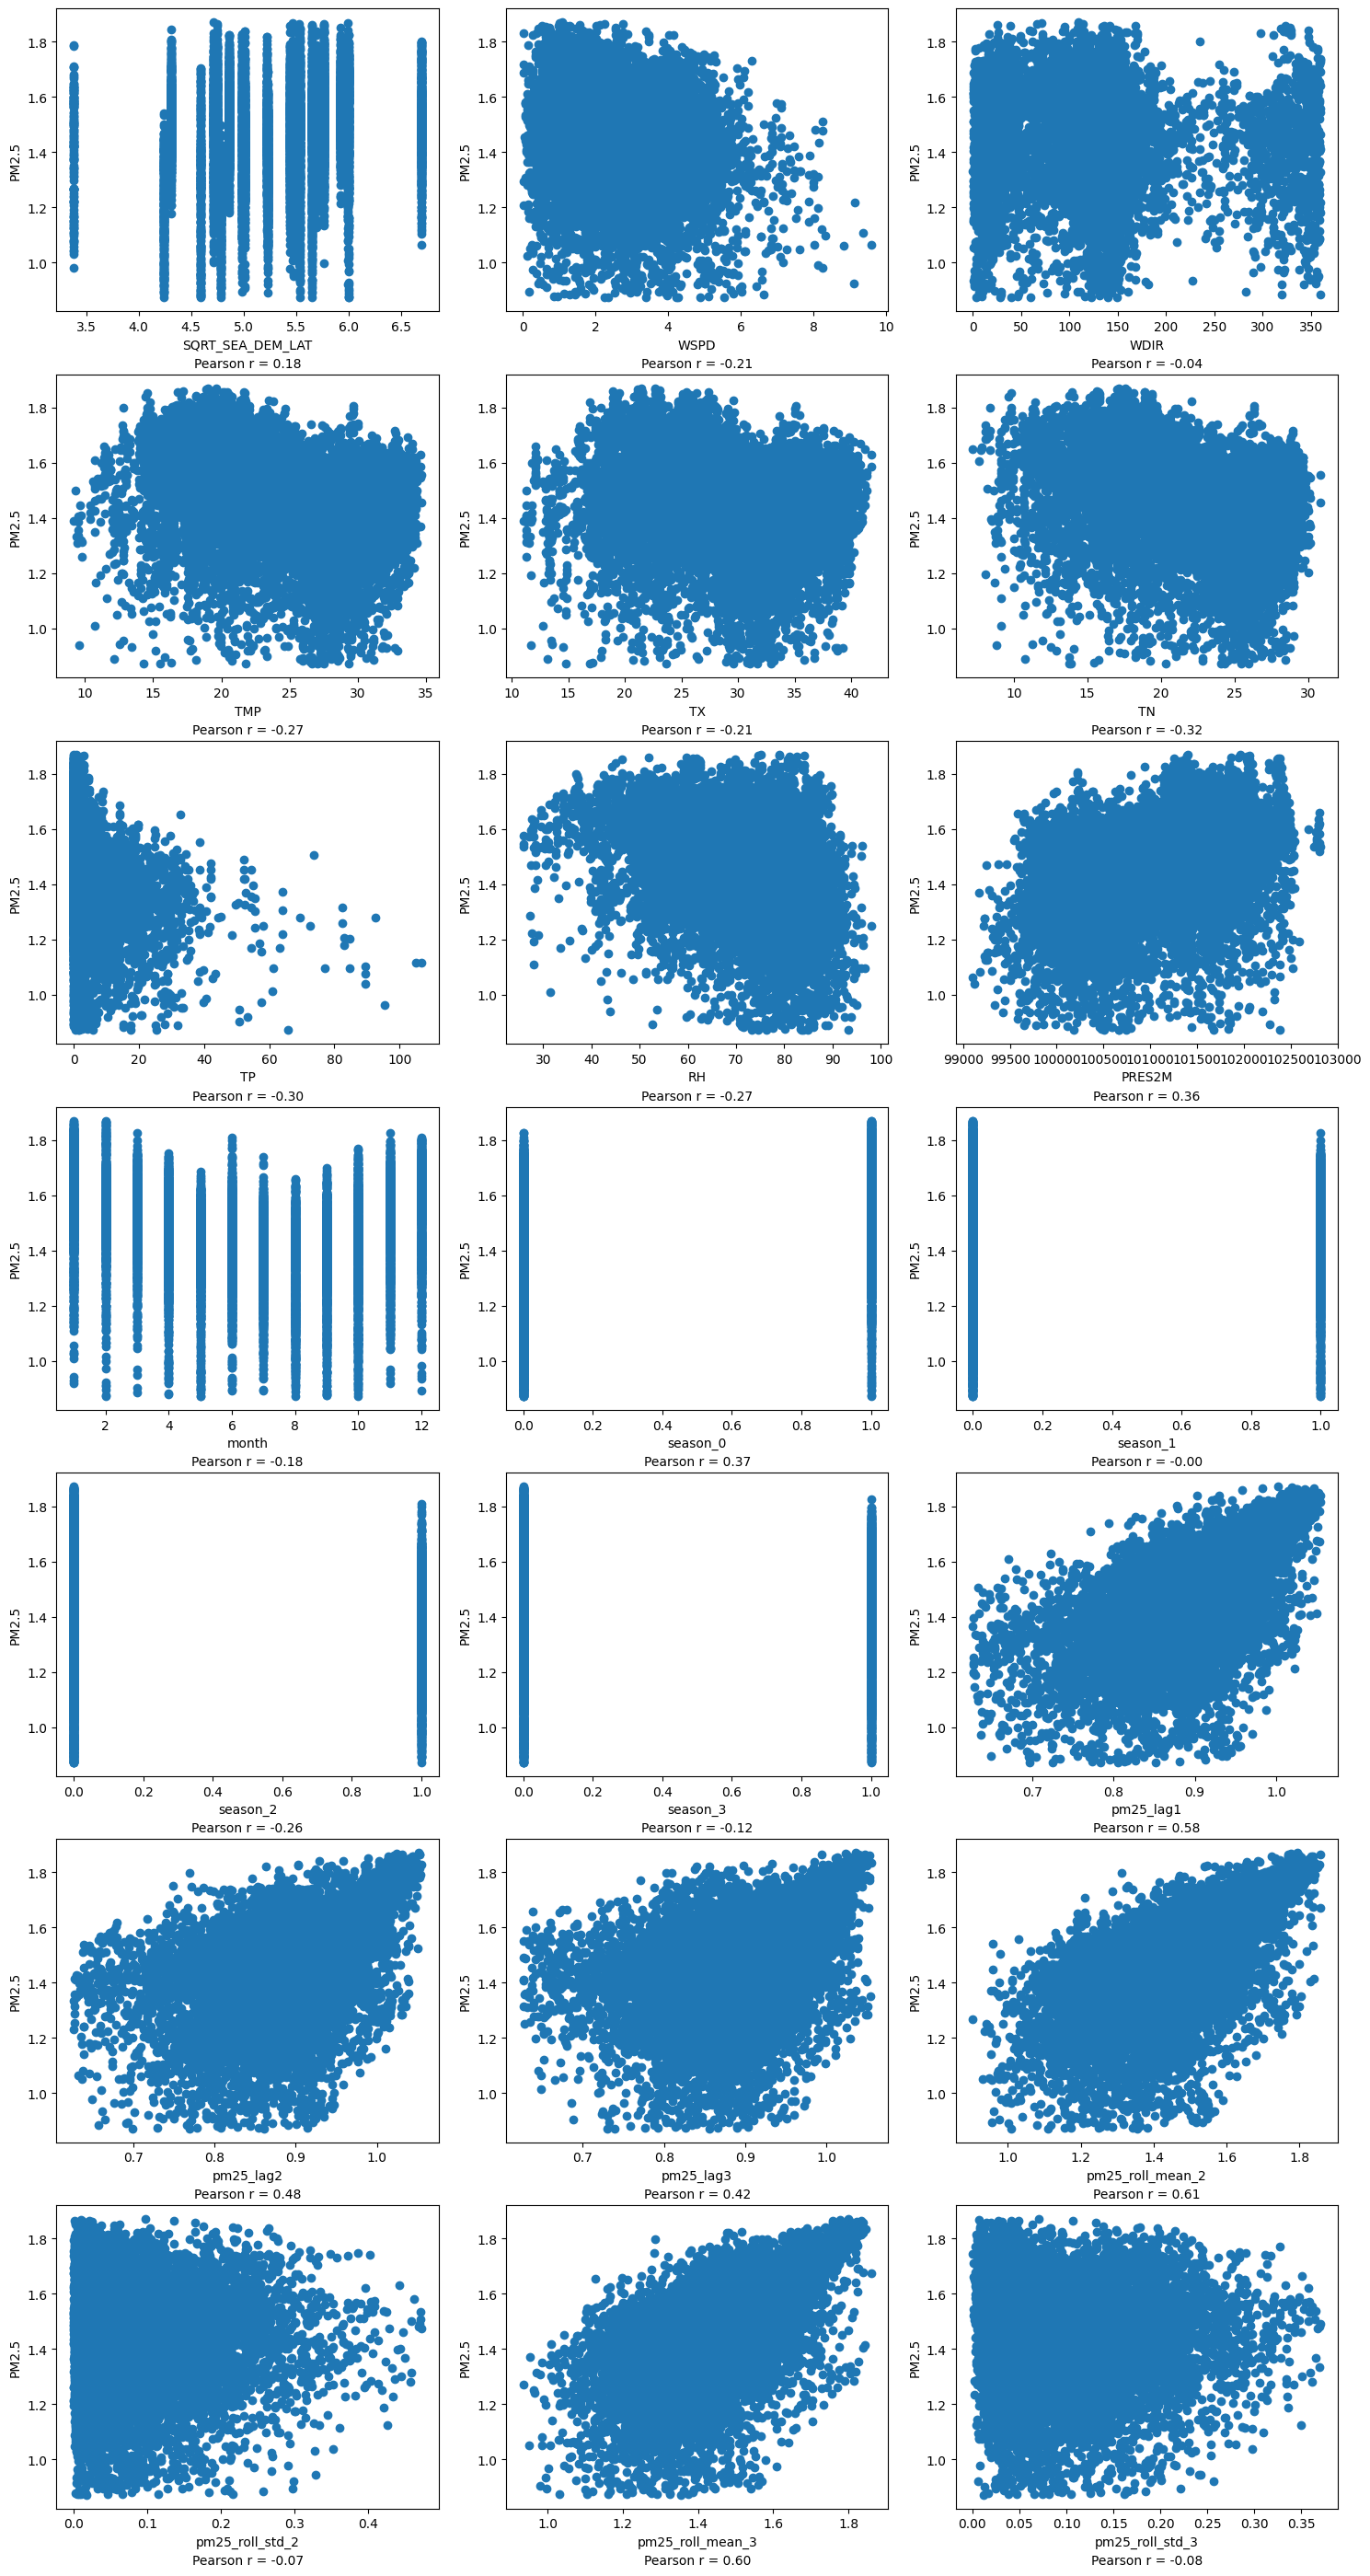

In [55]:
ncols = 3
nrows = math.ceil(len(features) / ncols)

# Create subplots
fig, axes = plt.subplots(nrows, ncols, figsize=(5 * ncols, 4 * nrows))
axes = axes.flatten()

for i, feature in enumerate(features):
  x = df[feature].values
  y = df['pm25'].values
  mask = ~np.isnan(x) & ~np.isnan(y)
  x, y = x[mask], y[mask]

  # Calculate Pearson correlation
  r = np.corrcoef(x, y)[0, 1]

  # Plot
  axes[i].scatter(x, y)
  axes[i].set_xlabel(feature)
  axes[i].set_ylabel('PM2.5')
  axes[i].text(0.5, -0.15, f'Pearson r = {r:.2f}',
                transform=axes[i].transAxes, ha='center', va='top')

for j in range(len(features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()